<a href="https://colab.research.google.com/github/yashfirkedata/BitC-Prediction/blob/main/BitC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BitCoin Price Prediciton**

In [1]:
!wget https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv

--2024-07-14 07:32:14--  https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159278 (156K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 155.54K  --.-KB/s    in 0.03s   

2024-07-14 07:32:14 (4.75 MB/s) - ‘BTC-USD.csv’ saved [159278/159278]



In [2]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # setting Date as out as index
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-13,11813.126953,11841.957031,10908.479492,11392.378906,11392.378906,21042616384
2019-07-14,11381.020508,11451.204102,10234.576172,10256.058594,10256.058594,22486000001
2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207
2019-07-16,10896.653320,10996.632813,9448.106445,9477.641602,9477.641602,24151199070
2019-07-17,9471.213867,9963.134766,9163.134766,9693.802734,9693.802734,24569921549


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-07-13 to 2024-07-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [4]:
len(df)

1828

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,56704.597656,58239.195313,56316.875000,58009.226563,58009.226563,27849512607
2024-07-10,58033.882813,59359.433594,57178.414063,57742.496094,57742.496094,26175260526
2024-07-11,57729.890625,59299.433594,57120.378906,57344.914063,57344.914063,28707803842
2024-07-12,57341.195313,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
2024-07-13,57908.738281,58191.808594,57800.246094,58087.300781,58087.300781,22515382272


In [6]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


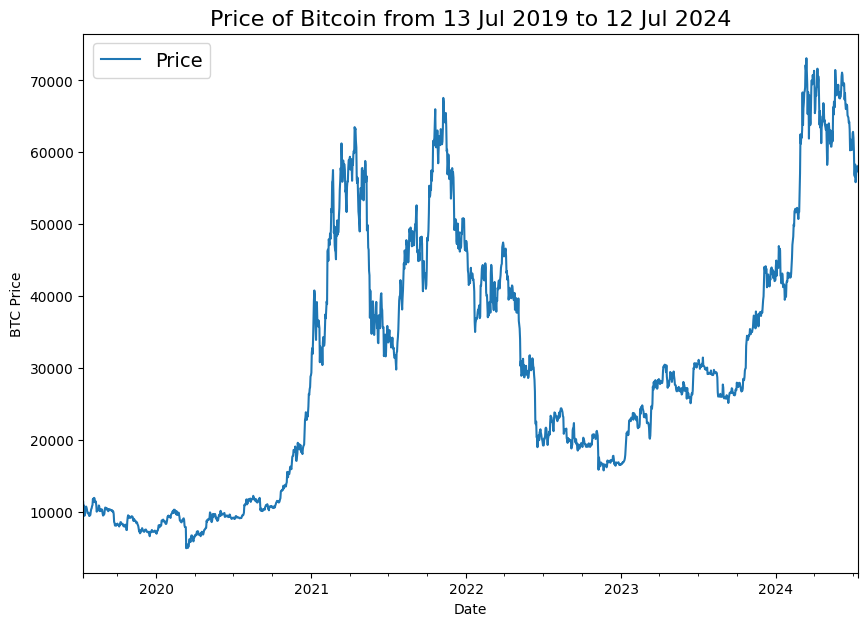

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 13 Jul 2019 to 12 Jul 2024", fontsize=16)
plt.legend(fontsize=14);

## Creating Train and Test Sets

In [8]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-07-13T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
        '2019-07-15T00:00:00.000000000', '2019-07-16T00:00:00.000000000',
        '2019-07-17T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
        '2019-07-19T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
        '2019-07-21T00:00:00.000000000', '2019-07-22T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11392.378906, 10256.058594, 10895.089844,  9477.641602,
         9693.802734, 10666.482422, 10530.732422, 10767.139648,
        10599.105469, 10343.106445]))

In [9]:
from sklearn.model_selection import train_test_split

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1462, 366, 1462, 366)

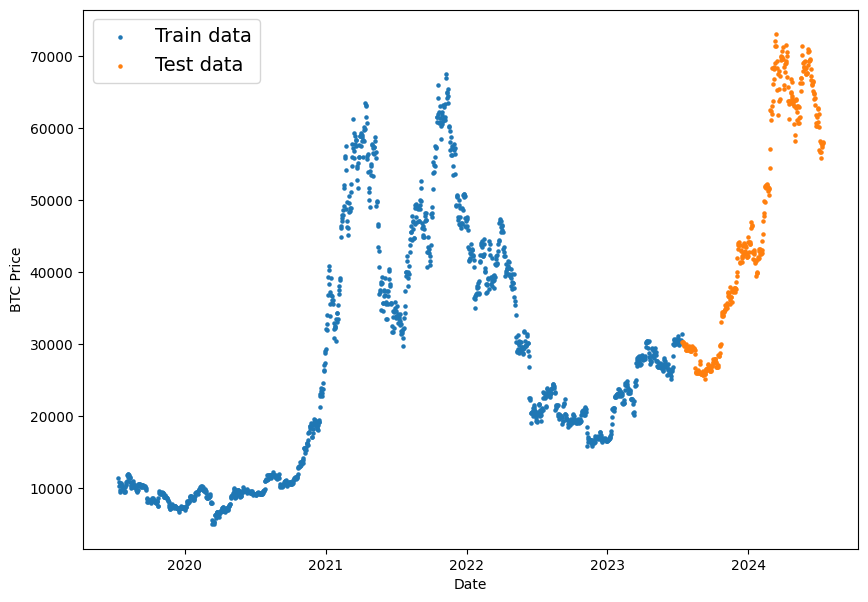

In [10]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [11]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

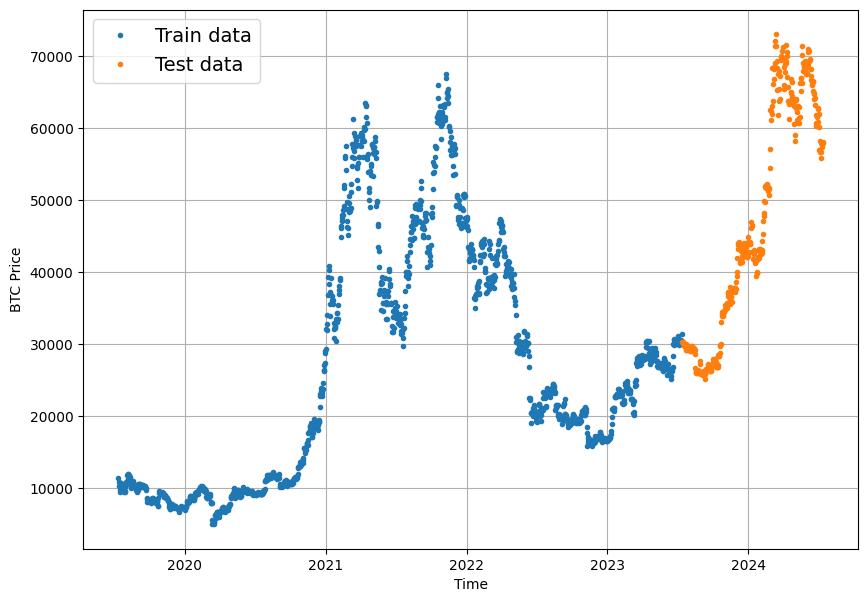

In [12]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# **Modelling**

> **horizon** = number of timesteps to predict into future

> **window** = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

## **Model 0:** Naive Forecast (baseline)

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

An open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

Because of this it will be very hard for us to beat this baseline model.

In [13]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([30334.068359, 30295.806641, 30249.132813, 30145.888672,
        29856.5625  , 29913.923828, 29792.015625, 29908.744141,
        29771.802734, 30084.539063]),
 array([60173.921875, 56977.703125, 56662.375   , 58303.539063,
        55849.109375, 56705.097656, 58009.226563, 57742.496094,
        57344.914063, 57899.464844]))

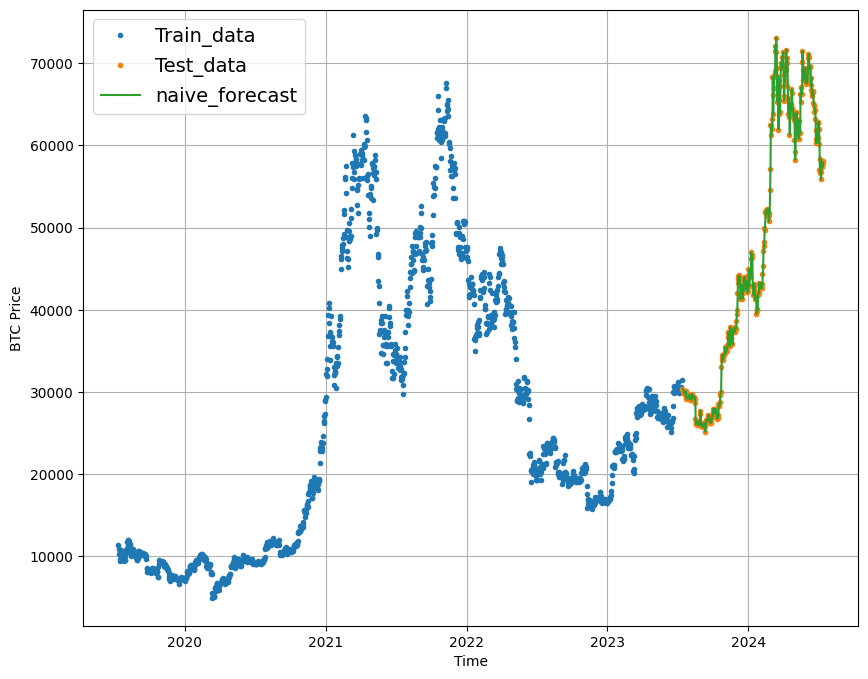

In [14]:
# Plotting baseline
plt.figure(figsize = (10,8))
plot_time_series(timesteps = X_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label="naive_forecast")

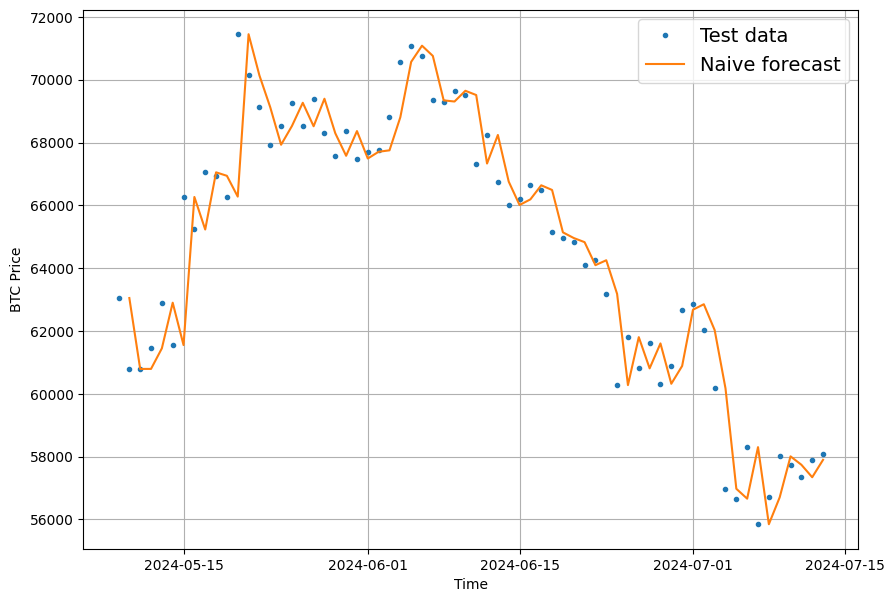

In [15]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

We can observe that out naive forecast comes slightly aster the test data. This is because the naive forecast uses the previous timestep value to predict the next timestep value.

### Evaluation

 Mean Absolute Scaled Error (MASE) is a measure for determining the effectiveness of forecasts generated through an algorithm by comparing the predictions with the output of a naïve forecasting approach.

 MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.

In [16]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true,y_pred))
  mae_naive_no_seasonality = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_seasonality

In [17]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [18]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 863.43085,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

### Data Preprocessing

To use the data for our supervised task using Dense and Conv etc.. layers, we need to convert the data in windows => Windowing

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [19]:
HORIZON = 1
WINDOW_SIZE = 7

In [20]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [21]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


#### Creating a funtion to make windows utilizing our data

In [22]:
# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # minus 1 to account for 0 indexing
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # Indexing on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [23]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [24]:
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [11392.378906 10256.058594 10895.089844  9477.641602  9693.802734
 10666.482422 10530.732422] -> Label: [10767.139648]
Window: [10256.058594 10895.089844  9477.641602  9693.802734 10666.482422
 10530.732422 10767.139648] -> Label: [10599.105469]
Window: [10895.089844  9477.641602  9693.802734 10666.482422 10530.732422
 10767.139648 10599.105469] -> Label: [10343.106445]
Window: [ 9477.641602  9693.802734 10666.482422 10530.732422 10767.139648
 10599.105469 10343.106445] -> Label: [9900.767578]
Window: [ 9693.802734 10666.482422 10530.732422 10767.139648 10599.105469
 10343.106445  9900.767578] -> Label: [9811.925781]


In [25]:
# View the last 3 windows/labels
for i in range(5):
  print(f"Window: {full_windows[i-5]} -> Label: {full_labels[i-5]}")

Window: [62029.015625 60173.921875 56977.703125 56662.375    58303.539063
 55849.109375 56705.097656] -> Label: [58009.226563]
Window: [60173.921875 56977.703125 56662.375    58303.539063 55849.109375
 56705.097656 58009.226563] -> Label: [57742.496094]
Window: [56977.703125 56662.375    58303.539063 55849.109375 56705.097656
 58009.226563 57742.496094] -> Label: [57344.914063]
Window: [56662.375    58303.539063 55849.109375 56705.097656 58009.226563
 57742.496094 57344.914063] -> Label: [57899.464844]
Window: [58303.539063 55849.109375 56705.097656 58009.226563 57742.496094
 57344.914063 57899.464844] -> Label: [58087.300781]


Similarly can be implemented using `tf.keras.preprocessing.timeseries_dataset_from_array()`.

It returns data in form of tf.data.Dataset instance => faster processing

### Turning windows into training and test sets

In [26]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [27]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [28]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [29]:
train_windows[:5], train_labels[:5]

(array([[11392.378906, 10256.058594, 10895.089844,  9477.641602,
          9693.802734, 10666.482422, 10530.732422],
        [10256.058594, 10895.089844,  9477.641602,  9693.802734,
         10666.482422, 10530.732422, 10767.139648],
        [10895.089844,  9477.641602,  9693.802734, 10666.482422,
         10530.732422, 10767.139648, 10599.105469],
        [ 9477.641602,  9693.802734, 10666.482422, 10530.732422,
         10767.139648, 10599.105469, 10343.106445],
        [ 9693.802734, 10666.482422, 10530.732422, 10767.139648,
         10599.105469, 10343.106445,  9900.767578]]),
 array([[10767.139648],
        [10599.105469],
        [10343.106445],
        [ 9900.767578],
        [ 9811.925781]]))

### Setting up Model Checkpoint

In [30]:
import os
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)


## **Model 1:** Dense Model (window = 7, horizon = 1)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(126, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear is same as having no activation
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [32]:
model_1.fit(x= train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
12/12 [==============================] - 3s 140ms/step - loss: 6747.7754 - mae: 6747.7754 - val_loss: 6575.0713 - val_mae: 6575.0713
Epoch 2/100
12/12 [==============================] - 1s 104ms/step - loss: 2550.8813 - mae: 2550.8813 - val_loss: 4012.7322 - val_mae: 4012.7322
Epoch 3/100
12/12 [==============================] - 1s 100ms/step - loss: 1541.7628 - mae: 1541.7628 - val_loss: 1631.4393 - val_mae: 1631.4393
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1218.0013 - mae: 1218.0013 - val_loss: 1684.6853 - val_mae: 1684.6853
Epoch 5/100
12/12 [==============================] - 1s 115ms/step - loss: 1136.7778 - mae: 1136.7778 - val_loss: 1341.1797 - val_mae: 1341.1797
Epoch 6/100
12/12 [==============================] - 2s 193ms/step - loss: 1070.6353 - mae: 1070.6353 - val_loss: 1211.3862 - val_mae: 1211.3862
Epoch 7/100
12/12 [==============================] - 1s 71ms/step - loss: 993.4559 - mae: 993.4559 - val_loss: 1156.5203 - val_mae:

In [33]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 888.3355 - mae: 888.3355


[888.3355102539062, 888.3355102539062]

In [34]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 849.2026 - mae: 849.2026


[849.2025756835938, 849.2025756835938]

So our best model_1 is off by 870 MAE

### Making forecast with model (on test data)

In [35]:
def make_preds(model,input_data):
  """
  Used to make predictions on input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)


In [36]:
model_1_preds = make_preds(model_1, test_windows)

12/12 [==============================] - 0s 2ms/step


In [37]:
len(model_1_preds), model_1_preds[:10]

(365,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([30592.979, 30399.457, 30283.08 , 30155.639, 29936.885, 29958.928,
        29837.428, 29919.56 , 29838.281, 30071.352], dtype=float32)>)

In [38]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 849.2029,
 'mse': 1765712.9,
 'rmse': 1328.8013,
 'mape': 1.6902344,
 'mase': 54.139793}

In [39]:
naive_results

{'mae': 863.43085,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Surprisingly our Model_1 itself beats out naive_model.

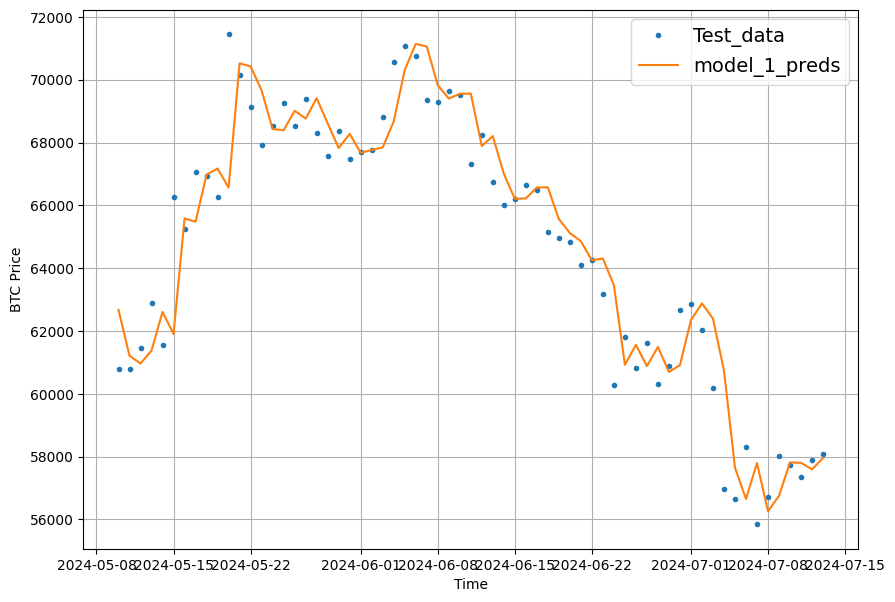

In [40]:
# plotting
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## **Model 2:** Dense Model (window = 30, horizon = 1)

In [41]:
HORIZON = 1
WINDOW_SIZE = 30

In [42]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1798, 1798)

In [43]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1438, 360, 1438, 360)

In [44]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [45]:
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 1095.8420


1095.842041015625

In [46]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 3ms/step - loss: 906.3913


906.3912963867188

In [47]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

12/12 [==============================] - 0s 5ms/step


In [48]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 906.3913,
 'mse': 1829173.8,
 'rmse': 1352.4695,
 'mape': 1.8322908,
 'mase': 53.7671}

In [49]:
naive_results

{'mae': 863.43085,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Our Model performs worse than out Naive model in almost all metrics.

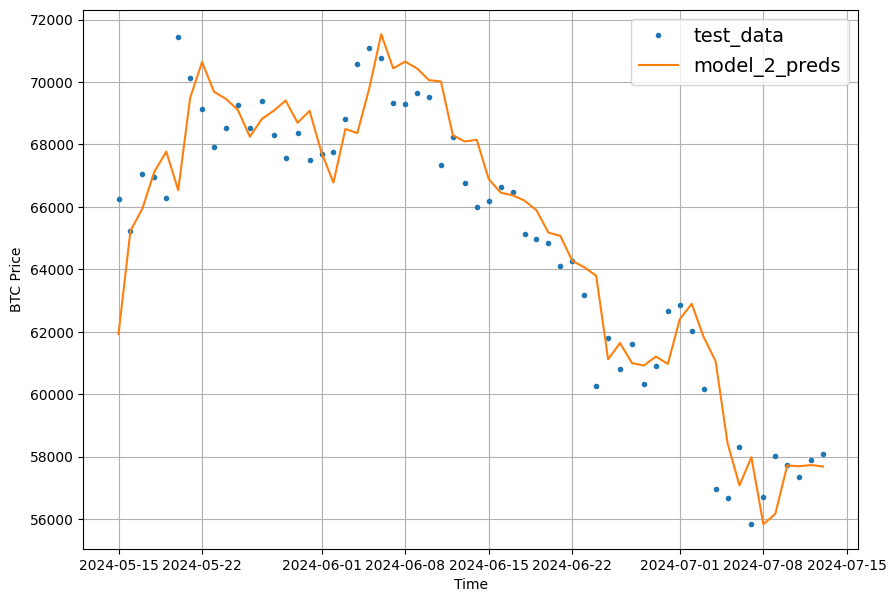

In [50]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## **Model 3:** Dense Model (window = 30, horizon = 7)

In this model, we will try to predict 7 days ahead using data of previous 30 days.

In [51]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1792, 1792)

In [52]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1433, 359, 1433, 359)

In [53]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [54]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 1983.7902


1983.7901611328125

In [55]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 3ms/step - loss: 1824.3785


1824.3785400390625

We can see that the error is too high compared to previous models. THis is because we are predicting more and more in the future. Generally dekha jaaye to its difficult to predict further in the future.

In [57]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[30822.16 , 30875.186, 31488.035, 31661.865, 31725.842, 31514.371,
        31416.428],
       [30466.656, 30742.502, 31215.875, 31610.635, 31179.934, 31605.896,
        31019.922],
       [30165.787, 30513.848, 30960.13 , 30980.217, 30957.479, 30813.984,
        30736.617],
       [30106.207, 30678.074, 31162.77 , 31224.854, 30860.818, 31109.713,
        30797.984],
       [30261.154, 30287.256, 30757.72 , 30848.787, 30525.99 , 30643.457,
        30607.79 ]], dtype=float32)>

In [58]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([1334.5447 , 1171.9071 ,  807.798  , 1062.2737 ,  865.2603 ,
         624.30414,  548.05383,  748.7704 ,  591.79297,  861.67413,
         372.14594,  363.93695,  217.46457,  292.32785,  153.82506,
         304.14926,  375.0173 ,  384.04184,  447.65402,  385.57254,
         226.54408,  184.2235 ,  327.14203,  347.81   ,  333.9509 ,
         268.79242,  345.0798 ,  682.52844, 1147.0862 , 1631.4252 ,
        2063.1113 , 2427.1426 , 2728.3794 , 2741.097  , 1641.1716 ,
         839.1351 ,  361.1741 ,  253.09012,  308.33957,  599.7821 ,
         748.53375,  702.22406,  417.1462 ,  501.45508,  625.72125,
         753.9567 , 1031.2628 , 1446.9325 ,  752.6356 ,  420.06363,
         449.4802 ,  355.48297,  301.2673 ,  370.46735,  461.37695,
         641.97015,  664.36633,  535.5678 ,  567.4899 , 1012.96454,
        1122.1517 , 1103.9777 ,  735.3089 ,  305.78906,  218.95842,
         410.4428 ,  498.74164,  864.5508 , 1195.2413 ,  472.49887,
         395.82617,  423.01617,  453.5519

We are getting multi dimensional output. This is because preddictions are getting evaluated across the horizon i.e 7 predictions at a time,
so we need to reduce_mean.

In [59]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [76]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1824.3783,
 'mse': 6915356.5,
 'rmse': 2099.8423,
 'mape': 3.7243261,
 'mase': 53.600124}

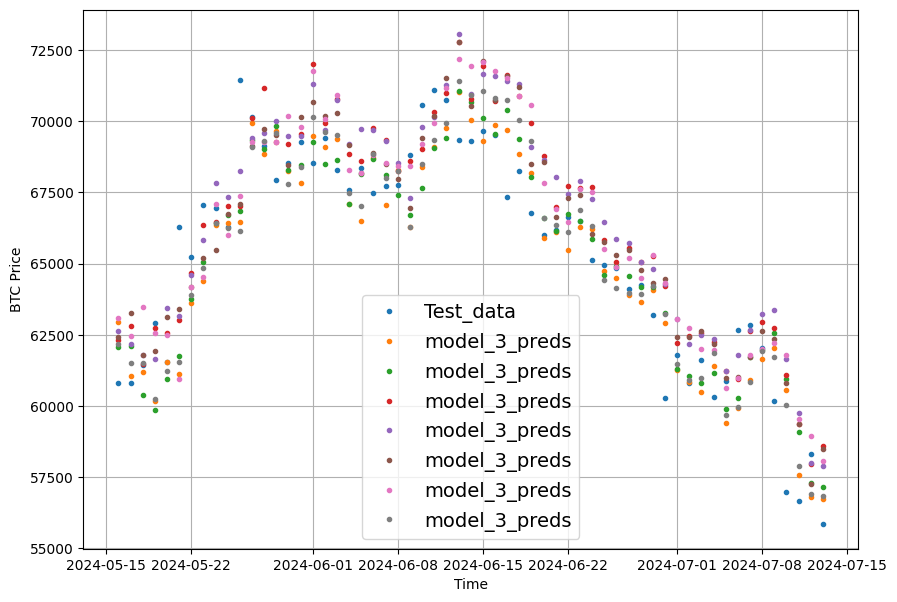

In [77]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

As our predictions are  multidimensional , our graph is kind of useless. We need to bring it to 1D.

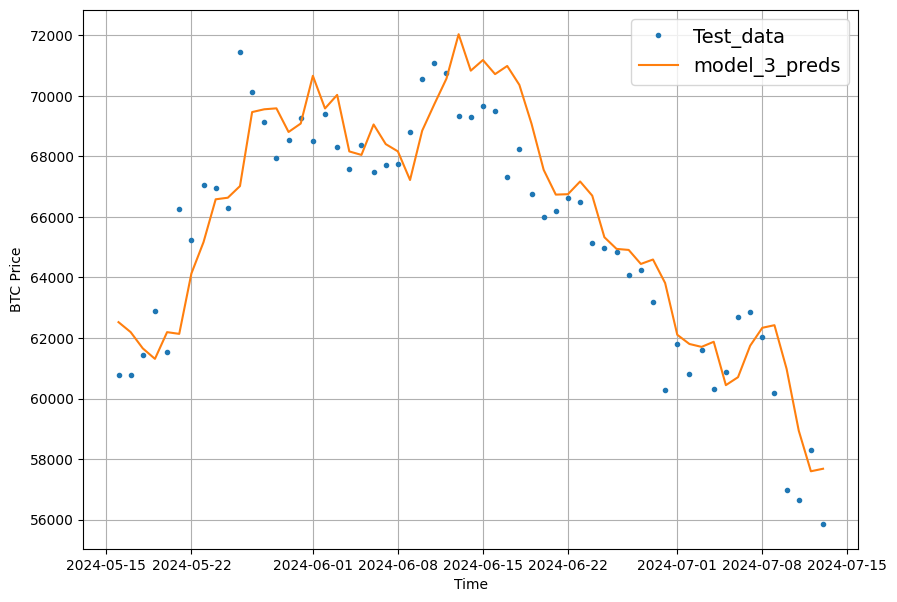

In [78]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

Using reduce_mean may lose the information as we have made predictions fot the 7 days are averaging them is not right, but it helps us plot the graph so we did it.

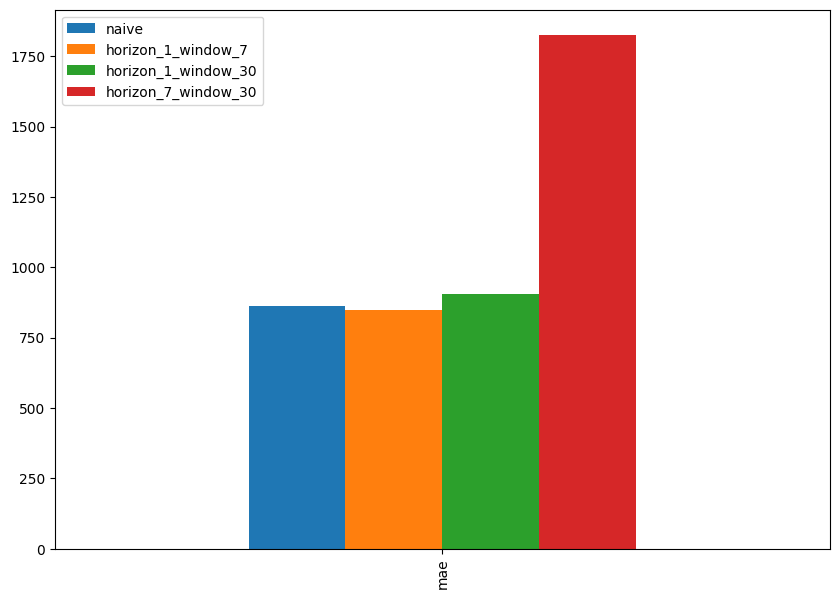

In [80]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [81]:
naive_results["mae"], model_1_results["mae"]

(863.43085, 849.2029)

In [84]:
print(pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},index = ["mae"]))

          naive  horizon_1_window_7  horizon_1_window_30  horizon_7_window_30
mae  863.430847          849.202881           906.391296          1824.378296


> Imp point: The naive model is performing so good because of the presence of Autocorrelation in the data.  If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value.  

## **Model 4:** Conv1D

As this is a sequence to sequence model, we can use Conv1D

In [85]:
HORIZON = 1
WINDOW_SIZE = 7

In [86]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [87]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [89]:
train_windows.shape

(1456, 7)

In [92]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[11392.379]
 [10256.059]
 [10895.09 ]
 [ 9477.642]
 [ 9693.803]
 [10666.482]
 [10530.732]]


In [93]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  # creating a lambda layer to preprocess inputs else u will encounter shape eroor.
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
12/12 [==============================] - 2s 76ms/step - loss: 19536.9277 - val_loss: 20384.7910
Epoch 2/100
12/12 [==============================] - 1s 63ms/step - loss: 5662.9492 - val_loss: 3938.5742
Epoch 3/100
12/12 [==============================] - 1s 66ms/step - loss: 2653.1189 - val_loss: 1490.2065
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1569.4982 - val_loss: 1495.8950
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 1355.5077 - val_loss: 1657.4719
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 1246.6864 - val_loss: 1494.4061
Epoch 7/100
12/12 [==============================] - 2s 136ms/step - loss: 1193.0524 - val_loss: 1445.1177
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 1178.1670 - val_loss: 1492.7144
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 1187.5748 - val_loss: 1477.0135
Epoch 10/100
12/12 [============================

In [94]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 877.7987


877.7987060546875

In [96]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

12/12 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30691.492, 30440.994, 30249.797, 30103.713, 29943.67 , 29863.78 ,
       29792.508, 29847.262, 29797.107, 29974.57 ], dtype=float32)>

In [97]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 877.7988,
 'mse': 1848858.0,
 'rmse': 1359.7272,
 'mape': 1.7563933,
 'mase': 54.139793}

In [98]:
naive_results

{'mae': 863.43085,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

Our Conv1D model is still off from out baseline model.

## **Model 5:** RNN (LSTM)

In [100]:
tf.random.set_seed(42)

# building an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x) # we didnt use default tanh because tanh activation can saturate with large input values, leading to vanishing gradients and ineffective learning.
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/12 [==============================] - 5s 235ms/step - loss: 25248.9453 - val_loss: 41582.3633
Epoch 2/100
12/12 [==============================] - 2s 206ms/step - loss: 21952.1562 - val_loss: 35901.5898
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 18191.7344 - val_loss: 27693.8164
Epoch 4/100
12/12 [==============================] - 3s 288ms/step - loss: 12741.2441 - val_loss: 15680.7041
Epoch 5/100
12/12 [==============================] - 5s 455ms/step - loss: 4914.4600 - val_loss: 1934.9872
Epoch 6/100
12/12 [==============================] - 5s 414ms/step - loss: 2232.0332 - val_loss: 1857.2614
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 1460.3907 - val_loss: 1881.5238
Epoch 8/100
12/12 [==============================] - 2s 218ms/step - loss: 1303.0953 - val_loss: 1516.5867
Epoch 9/100
12/12 [==============================] - 0s 11ms/step - loss: 1271.5432 - val_loss: 1590.6573
Epoch 10/100
12/12 [===========

In [101]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 914.6382


914.6382446289062

In [102]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30731.893, 30584.201, 30328.396, 30220.69 , 29981.818, 29815.06 ,
       29823.592, 29856.459, 29790.342, 29965.182], dtype=float32)>

In [103]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 914.6382,
 'mse': 1980176.0,
 'rmse': 1407.1873,
 'mape': 1.835276,
 'mase': 54.139793}

It seems even with an LSTM-powered RNN we weren't able to beat our naive models results.